<a href="https://colab.research.google.com/github/naserrucu/DATASET/blob/master/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En primer lugar vamos a importar las librerías que necesitaremos así como los datos con los que vamos a trabajar.

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import initializers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np

Using TensorFlow backend.


In [0]:
url = "https://raw.githubusercontent.com/naserrucu/DATASET/master/FHCRC_Data.csv"
FHCRC_Data = pandas.read_csv(url, header=0 , delimiter=";" )
print(FHCRC_Data[:5])

   ID_Sujeto       Grupo  Estadio  ...     CA125  Spondin2       HE4
0     630001  GP Control      NaN  ...  0.976997 -0.821159 -0.743266
1     630002        Case      1.0  ...  4.087777  0.312527  4.645437
2     630003  BD Control      NaN  ... -0.503635 -0.695408  0.451831
3     630004  BD Control      NaN  ...  0.210976 -0.956100 -0.743266
4     630005  GP Control      NaN  ...  0.100370 -0.379579  3.221745

[5 rows x 9 columns]


In [0]:
url = "https://raw.githubusercontent.com/naserrucu/DATASET/master/Harvard_Data.csv"
Harvard_Data = pandas.read_csv(url, header=0 , delimiter=";" )
print(Harvard_Data[:5])

   ID_Sujeto       Grupo  Estadio  ...  Spondin -2      IGF2  Mesothelin
0     630001  GP Control      NaN  ...   -0.868715  0.032236   -0.794183
1     630002        Case      1.0  ...    0.591419 -0.024923    4.608571
2     630003  BD Control      NaN  ...   -0.590634  0.591796    0.648319
3     630004  BD Control      NaN  ...   -0.161549  0.391244   -0.555823
4     630005  GP Control      NaN  ...   -0.425836 -0.587535   -0.968208

[5 rows x 17 columns]


In [0]:
url = "https://raw.githubusercontent.com/naserrucu/DATASET/master/MD_Anderson_Data.csv"
MD_Anderson_Data = pandas.read_csv(url, header=0 , delimiter=";" )
print(MD_Anderson_Data[:5])

   ID_Sujeto       Grupo  ...  Model without CA-125  Model with CA-125
0     630001  GP Control  ...              0.291163           0.128034
1     630002        Case  ...              0.884846           0.997806
2     630003  BD Control  ...              0.038676           0.015314
3     630004  BD Control  ...              0.827662           0.590211
4     630005  GP Control  ...              0.985228           0.939092

[5 rows x 13 columns]


In [0]:
url = "https://raw.githubusercontent.com/naserrucu/DATASET/master/Pittsburgh_Data.csv"
Pittsburgh_Data = pandas.read_csv(url, header=0 , delimiter=";" )
print(Pittsburgh_Data[:5])

   ID_Sujeto       Grupo  Estadio  ...    CA_125     IL_2R  Mesothelin
0     630001  GP Control      NaN  ... -0.181089  0.106826   -0.463450
1     630002        Case      1.0  ...  3.487593  0.458055    0.664565
2     630003  BD Control      NaN  ... -0.425115 -0.030709    0.167525
3     630004  BD Control      NaN  ...  0.429698 -0.179023    1.156893
4     630005  GP Control      NaN  ... -0.034222  0.189418   -0.682036

[5 rows x 38 columns]


# Preprocesado de los datos

Para realizar el preprocesado de los datos se deben analizar solo los elementos del conjunto de entrenamiento. Las decisiones tomadas (transformaciones a realizar, variables a eliminar, etc.) deben aplicarse a ambos conjuntos, tanto al de entrenamiento como al de test.

## Eliminar columnas innecesarias

Para empezar, se debe eliminar la columna "Estadio" de cada set, ya que no va a ser utilizada para hacer la predicción. Además, la columna "Training_Test" sólo es necesaria para hacer la separación de los conjuntos y, como se detalla más adelante, no va a ser utilizada, por lo que también puede ser eliminada. Por último, la columna ID_Sujeto es innecesaria puesto que no aporta información, simplemente sirve de identificador, por lo que también se elimina.

In [0]:
FHCRC_Data = FHCRC_Data.drop(['ID_Sujeto','Estadio','Training_Test'], axis=1)

Harvard_Data = Harvard_Data.drop(['ID_Sujeto','Estadio','Training_Test'], axis=1)

MD_Anderson_Data = MD_Anderson_Data.drop(['ID_Sujeto','Estadio','Training_Test'], axis=1)

Pittsburgh_Data = Pittsburgh_Data.drop(['ID_Sujeto','Estadio','Training_Test'], axis=1)

## Tratamiento de los valores nulos

A continuación, se hace un análisis de los valores nulos que contiene cada dataset.

*   FHCRC



In [0]:
FHCRC_Data.isnull().sum()

Grupo       0
MSLN        0
IGFBP2      0
CA125       0
Spondin2    0
HE4         0
dtype: int64

*   Harvard



In [0]:
Harvard_Data.isnull().sum()

Grupo                                0
CA153                               18
CA125                               17
Kallikrein 6                         2
CA199                               17
CA724                               66
HE5                                  2
Macrophage inhibitory cytokine 1     2
Chitinase                            0
B7H4                                 1
Decoy Receptor 3 (DcR3)              8
Spondin -2                           5
IGF2                                 0
Mesothelin                           1
dtype: int64

*   MD Anderson



In [0]:
MD_Anderson_Data.isnull().sum()

Grupo                                          0
Apolipoprotein A1                              0
Connective tissue activating protein 3         0
Inter-alpha-trypsin inhibitor heavy chain      0
Beta 2 - Microglobulin                         0
Hepcidin                                       0
TRF                                            0
TT                                             0
Model without CA-125                           0
Model with CA-125                             17
dtype: int64

*   Pittsburgh



In [0]:
Pittsburgh_Data.isnull().sum()

Grupo                                          0
MMP_2                                         10
TNFri                                          1
LH                                             0
Prolactin                                      0
IGFBP_1                                        0
CEA                                            6
EGFR                                           5
IL_6                                          11
CA_153                                         7
Cytokeratin 19                                10
MPO                                            1
Kallikrein 8                                   1
Macrophage Inhibiting Factor                   5
Soluble vascular cell adhesion Molecule 1      0
IL_10                                          9
TSH                                            0
EOTAXIN                                       10
MMP_3                                          9
FSH                                            0
IL_8                

Para el dataset FHCRC no se encuentra ningún valor nulo, por lo tanto no hay que hacer ningún tratamiento específico.

Para el dataset MD Anderson encontramos algunos valores nulos, pero son pocas filas, por lo que eliminarlas no supone gran pérdida de información.

Por último, para los datasets Harvard y Pittsburgh se puede apreciar un gran número de variables con valores nulos. Sin embargo, es importante ver en detalle cuantas filas están compuestas realmente por algún valor nulo para saber cómo de grande sería la pérdida de información si eliminamos estas filas o si se debería hacer otro tipo de tratamiento.

In [0]:
print("Nulos Harvard_Data: ",sum([True for idx,row in Harvard_Data.iterrows() if any(row.isnull())]))
#print("\n")
print("Nulos Pittsburgh_Data: ",sum([True for idx,row in Pittsburgh_Data.iterrows() if any(row.isnull())]))

Nulos Harvard_Data:  79
Nulos Pittsburgh_Data:  83


Las filas afectadas para Harvard y Pittsburgh son 79 y 83 respectivamente sobre un total de 800 datos cada una, por lo que es una pérdida de información asumible si se eliminan dichas filas.

A continuación se eliminan las filas con valores nulos de cada dataset.

In [0]:
Harvard_Data = Harvard_Data.dropna()

MD_Anderson_Data = MD_Anderson_Data.dropna()

Pittsburgh_Data = Pittsburgh_Data.dropna()

Si ahora se vuelve a visualizar el número de valores nulos, se puede comprobar que no queda ninguno.

In [0]:
print("Nulos FHCRC_Data: ",sum([True for idx,row in FHCRC_Data.iterrows() if any(row.isnull())]))
#print("\n")
print("Nulos Harvard_Data: ",sum([True for idx,row in Harvard_Data.iterrows() if any(row.isnull())]))
#print("\n")
print("Nulos MD_Anderson_Data: ",sum([True for idx,row in MD_Anderson_Data.iterrows() if any(row.isnull())]))
#print("\n")
print("Nulos Pittsburgh_Data: ",sum([True for idx,row in Pittsburgh_Data.iterrows() if any(row.isnull())]))

Nulos FHCRC_Data:  0
Nulos Harvard_Data:  0
Nulos MD_Anderson_Data:  0
Nulos Pittsburgh_Data:  0


## Analizar la correlación entre variables

Cuando dos variables están muy correladas entre ellas básicamente representan la misma información
por lo que suele ser interesante eliminar una de dichas variables y simplificar el modelo. Para analizar la posible correlación se hace uso del Coeficiente de correlación de Pearson representado en una matriz de confusión. Se puede considerar que dos variables están altamente correlacionadas si el Coeficiente de Pearson supera el 90%. Es necesario precisar que en la diagonal principal de la matriz se encuentran las variables propias, por tanto el coeficiente de correlación siempre será 1.

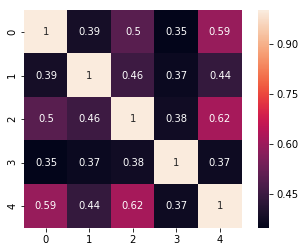

In [0]:
X_FHCRC, y_FHCRC = FHCRC_Data.iloc[:, 1:].values, FHCRC_Data.iloc[:, 0].values
seaborn.heatmap(pandas.DataFrame(X_FHCRC).corr(method = 'pearson'), square=True, annot=True)

Para el dataset FHCRC se puede ver que no hay variables altamente correlacionadas, puesto que ningún par supera el 90%.

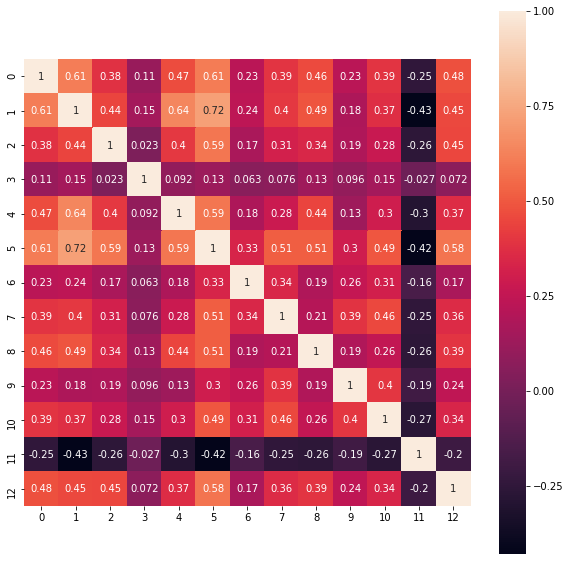

In [0]:
X_Harvard, y_Harvard = Harvard_Data.iloc[:, 1:].values, Harvard_Data.iloc[:, 0].values
plt.figure(figsize=(10,10))
seaborn.heatmap(pandas.DataFrame(X_Harvard).corr(method = 'pearson'), square=True, annot=True)

Para el dataset Harvard, igual que en el caso anterior, se puede ver que no hay variables altamente correlacionadas, puesto que ningún par supera el 90%.

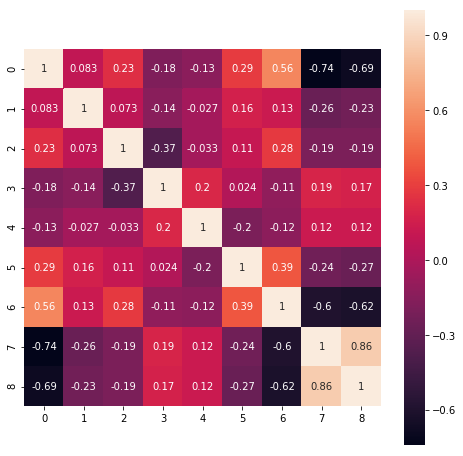

In [0]:
X_MD_Anderson, y_MD_Anderson = MD_Anderson_Data.iloc[:, 1:].values, MD_Anderson_Data.iloc[:, 0].values
plt.figure(figsize=(8,8))
seaborn.heatmap(pandas.DataFrame(X_MD_Anderson).corr(method = 'pearson'), square=True, annot=True)

Para el dataset MD Anderson se encuentra que las variables correspondientes a las columnas 7 y 8 tienen una correlación importante, pero no superan el límite que se ha establecido para hacer un tratamiento específico.

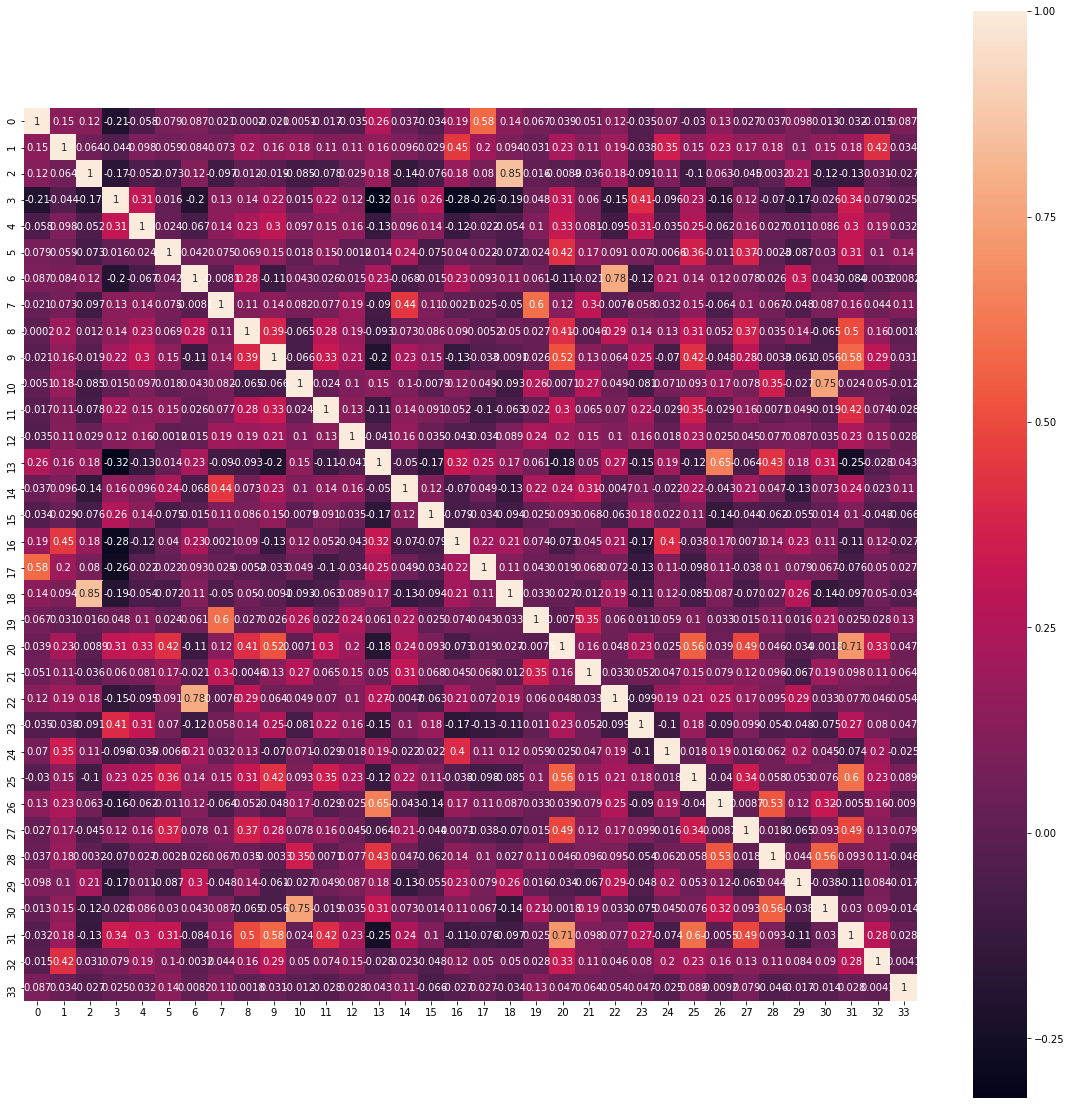

In [0]:
X_Pittsburgh, y_Pittsburgh = Pittsburgh_Data.iloc[:, 1:].values, Pittsburgh_Data.iloc[:, 0].values
plt.figure(figsize=(20,20))
seaborn.heatmap(pandas.DataFrame(X_Pittsburgh).corr(method = 'pearson'), square=True, annot=True)

Por último, para el dataset Pittsburgh, se observa que las variables correspondientes a las columnas 2 y 18 presentan una correlación del 85% que, como en el caso anterior, no es necesario tratar.

https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch04/ch04.ipynb

# Conversión de la variable de salida

Para poder clasificar los resultados en los diferentes grupos, es necesario convertir los datos de la columna a predecir a numéricos.
Como la intención de este estudio es diferenciar entre personas sin riesgo de cáncer, con posibles tumores benignos o con riesgo de tumor maligno, asociamos las etiquetas [0,1,2] a las correspondientes de la columna, es decir, "GP Control", "BD Control" y "Case".

Para hacer esto se crea un diccionario con los valores originales y los valores de reemplazo.

In [0]:
pandas.DataFrame(y_FHCRC).replace(('GP Control','BD Control','Case'),(0,0,1), inplace=True)
print(y_FHCRC[:5])

[0 1 0 0 0]


In [0]:
pandas.DataFrame(y_Harvard).replace(('GP Control','BD Control','Case'),(0,0,1), inplace=True)
print(y_Harvard[:5])

[0 1 0 0 0]


In [0]:
pandas.DataFrame(y_MD_Anderson).replace(('GP Control','BD Control','Case'),(0,0,1), inplace=True)
print(y_MD_Anderson[:5])

[0 1 0 0 0]


In [0]:
pandas.DataFrame(y_Pittsburgh).replace(('GP Control','BD Control','Case'),(0,0,1), inplace=True)
print(y_Pittsburgh[:5])

[0 1 0 0 0]


# Separación conjuntos de entrenamiento y test

Es importante que el conjunto de test se mantenga apartado y no se utilice la información que contiene para tomar decisiones sobre el entrenamiento puesto que hacerlo implica introducir sesgos en dicho entrenamiento. Así que lo primero que se debe hacer es dividir los datos y dejar de un lado los datos de test.

En los dataset que se han importado la columna "Training_Test" corresponde a los datos que han de ser utilizados para el entrenamiento y los que se deben utilizar para el test. Sin embargo, la proporción que se utiliza para cada parte es del 50%, esto implica tener muchos menos datos para el entrenamiento que si se hiciera la separación de forma manual. Por tanto, en lugar de hacer uso de esa columna, se separan los datos de forma aleatoria dejando un 70% para el entrenamiento y un 30% para el test.

In [0]:
X_train_FHCRC, X_test_FHCRC, y_train_FHCRC, y_test_FHCRC =\
    train_test_split(X_FHCRC, y_FHCRC,
                     test_size=0.3, 
                     random_state=0)

In [0]:
X_train_Harvard, X_test_Harvard, y_train_Harvard, y_test_Harvard =\
    train_test_split(X_Harvard, y_Harvard,
                     test_size=0.3, 
                     random_state=0)

In [0]:
X_train_MD_Anderson, X_test_MD_Anderson, y_train_MD_Anderson, y_test_MD_Anderson =\
    train_test_split(X_MD_Anderson, y_MD_Anderson,
                     test_size=0.3, 
                     random_state=0)

In [0]:
X_train_Pittsburgh, X_test_Pittsburgh, y_train_Pittsburgh, y_test_Pittsburgh =\
    train_test_split(X_Pittsburgh, y_Pittsburgh,
                     test_size=0.3, 
                     random_state=0)

# Definición del modelo

Fijamos una semilla para que los resultados sean reproducibles

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
def create_model(optimizer='adam', init_mode='glorot_normal',
                  activation='relu', dropout_rate=0.2, neurons=560, input_dim=5):
  # create model
  model = Sequential()
  model.add(Dense(neurons, input_dim=input_dim, activation=activation,
                  kernel_initializer=init_mode))
  model.add(Dropout(dropout_rate))
  model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

## Batch size y epochs

In [0]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model)
param_grid_FHCRC = dict(batch_size=batch_size, epochs=epochs, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
W0706 08:41:26.785858 140123409663872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 08:41:26.798933 140123409663872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 08:41:26.801925 140123409663872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0706 08:41:26.816725 14

Epoch 1/10
373/373 [==============================] - 1s 4ms/step - loss: 0.4010 - acc: 0.8525
Epoch 2/10
373/373 [==============================] - 0s 361us/step - loss: 0.2670 - acc: 0.8954
Epoch 3/10
373/373 [==============================] - 0s 346us/step - loss: 0.2649 - acc: 0.9062
Epoch 4/10
373/373 [==============================] - 0s 354us/step - loss: 0.2449 - acc: 0.9035
Epoch 5/10
373/373 [==============================] - 0s 355us/step - loss: 0.2393 - acc: 0.9169
Epoch 6/10
373/373 [==============================] - 0s 332us/step - loss: 0.2459 - acc: 0.9062
Epoch 7/10
373/373 [==============================] - 0s 394us/step - loss: 0.2377 - acc: 0.9088
Epoch 8/10
373/373 [==============================] - 0s 332us/step - loss: 0.2363 - acc: 0.9088
Epoch 9/10
373/373 [==============================] - 0s 369us/step - loss: 0.2284 - acc: 0.9035
Epoch 10/10
187/187 [==============================] - 0s 355us/step
Epoch 1/10
373/373 [==============================] - 0s 1ms

In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875000 using {'batch_size': 60, 'epochs': 10, 'input_dim': 5}
0.873214 (0.028891) with: {'batch_size': 10, 'epochs': 10, 'input_dim': 5}
0.864286 (0.029540) with: {'batch_size': 10, 'epochs': 50, 'input_dim': 5}
0.844643 (0.045427) with: {'batch_size': 10, 'epochs': 100, 'input_dim': 5}
0.873214 (0.035424) with: {'batch_size': 20, 'epochs': 10, 'input_dim': 5}
0.864286 (0.025073) with: {'batch_size': 20, 'epochs': 50, 'input_dim': 5}
0.844643 (0.037669) with: {'batch_size': 20, 'epochs': 100, 'input_dim': 5}
0.869643 (0.032912) with: {'batch_size': 40, 'epochs': 10, 'input_dim': 5}
0.867857 (0.036189) with: {'batch_size': 40, 'epochs': 50, 'input_dim': 5}
0.850000 (0.045434) with: {'batch_size': 40, 'epochs': 100, 'input_dim': 5}
0.875000 (0.029558) with: {'batch_size': 60, 'epochs': 10, 'input_dim': 5}
0.867857 (0.035416) with: {'batch_size': 60, 'epochs': 50, 'input_dim': 5}
0.862500 (0.035408) with: {'batch_size': 60, 'epochs': 100, 'input_dim': 5}
0.873214 (0.024645) with: 

In [0]:
batch_size_FHCRC= 60
epochs_FHCRC= 10

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model)
param_grid_Harvard = dict(batch_size=batch_size, epochs=epochs, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 4s 12ms/step - loss: 0.3786 - acc: 0.8601
Epoch 2/10
336/336 [==============================] - 0s 435us/step - loss: 0.2449 - acc: 0.9196
Epoch 3/10
336/336 [==============================] - 0s 441us/step - loss: 0.2004 - acc: 0.9226
Epoch 4/10
336/336 [==============================] - 0s 506us/step - loss: 0.1757 - acc: 0.9315
Epoch 5/10
336/336 [==============================] - 0s 431us/step - loss: 0.1409 - acc: 0.9524
Epoch 6/10
336/336 [==============================] - 0s 432us/step - loss: 0.1409 - acc: 0.9375
Epoch 7/10
336/336 [==============================] - 0s 440us/step - loss: 0.1310 - acc: 0.9524
Epoch 8/10
336/336 [==============================] - 0s 456us/step - loss: 0.1198 - acc: 0.9494
Epoch 9/10
336/336 [==============================] - 0s 442us/step - loss: 0.1005 - acc: 0.9613
Epoch 10/10
168/168 [==============================] - 2s 9ms/step
Epoch 1/10
336/336 [==============================] - 4s 12ms

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.906746 using {'batch_size': 80, 'epochs': 10, 'input_dim': 13}
0.888889 (0.022448) with: {'batch_size': 10, 'epochs': 10, 'input_dim': 13}
0.886905 (0.025717) with: {'batch_size': 10, 'epochs': 50, 'input_dim': 13}
0.886905 (0.022272) with: {'batch_size': 10, 'epochs': 100, 'input_dim': 13}
0.900794 (0.012231) with: {'batch_size': 20, 'epochs': 10, 'input_dim': 13}
0.884921 (0.023974) with: {'batch_size': 20, 'epochs': 50, 'input_dim': 13}
0.884921 (0.015623) with: {'batch_size': 20, 'epochs': 100, 'input_dim': 13}
0.898810 (0.004860) with: {'batch_size': 40, 'epochs': 10, 'input_dim': 13}
0.884921 (0.032360) with: {'batch_size': 40, 'epochs': 50, 'input_dim': 13}
0.882937 (0.026767) with: {'batch_size': 40, 'epochs': 100, 'input_dim': 13}
0.902778 (0.007424) with: {'batch_size': 60, 'epochs': 10, 'input_dim': 13}
0.888889 (0.022448) with: {'batch_size': 60, 'epochs': 50, 'input_dim': 13}
0.888889 (0.018400) with: {'batch_size': 60, 'epochs': 100, 'input_dim': 13}
0.906746 (0.0

In [0]:
batch_size_Harvard= 80
epochs_Harvard= 10

###MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model)
param_grid_MD_Anderson = dict(batch_size=batch_size, epochs=epochs, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
365/365 [==============================] - 8s 21ms/step - loss: 0.4682 - acc: 0.8055
Epoch 2/10
365/365 [==============================] - 0s 490us/step - loss: 0.4012 - acc: 0.8384
Epoch 3/10
365/365 [==============================] - 0s 534us/step - loss: 0.3762 - acc: 0.8493
Epoch 4/10
365/365 [==============================] - 0s 515us/step - loss: 0.3585 - acc: 0.8548
Epoch 5/10
365/365 [==============================] - 0s 503us/step - loss: 0.3435 - acc: 0.8630
Epoch 6/10
365/365 [==============================] - 0s 493us/step - loss: 0.3289 - acc: 0.8603
Epoch 7/10
365/365 [==============================] - 0s 515us/step - loss: 0.3390 - acc: 0.8411
Epoch 8/10
365/365 [==============================] - 0s 522us/step - loss: 0.3125 - acc: 0.8712
Epoch 9/10
365/365 [==============================] - 0s 497us/step - loss: 0.3027 - acc: 0.8630
Epoch 10/10
183/183 [==============================] - 3s 18ms/step
Epoch 1/10
365/365 [==============================] - 8s 21m

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844890 using {'batch_size': 100, 'epochs': 10, 'input_dim': 9}
0.822993 (0.013132) with: {'batch_size': 10, 'epochs': 10, 'input_dim': 9}
0.822993 (0.042024) with: {'batch_size': 10, 'epochs': 50, 'input_dim': 9}
0.821168 (0.027666) with: {'batch_size': 10, 'epochs': 100, 'input_dim': 9}
0.837591 (0.009720) with: {'batch_size': 20, 'epochs': 10, 'input_dim': 9}
0.810219 (0.030252) with: {'batch_size': 20, 'epochs': 50, 'input_dim': 9}
0.813869 (0.043102) with: {'batch_size': 20, 'epochs': 100, 'input_dim': 9}
0.841241 (0.012239) with: {'batch_size': 40, 'epochs': 10, 'input_dim': 9}
0.826642 (0.018493) with: {'batch_size': 40, 'epochs': 50, 'input_dim': 9}
0.810219 (0.045403) with: {'batch_size': 40, 'epochs': 100, 'input_dim': 9}
0.839416 (0.010747) with: {'batch_size': 60, 'epochs': 10, 'input_dim': 9}
0.832117 (0.032798) with: {'batch_size': 60, 'epochs': 50, 'input_dim': 9}
0.828467 (0.025027) with: {'batch_size': 60, 'epochs': 100, 'input_dim': 9}
0.841241 (0.013773) with:

In [0]:
batch_size_MD_Anderson= 100
epochs_MD_Anderson= 10

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model)
param_grid_Pittsburgh = dict(batch_size=batch_size, epochs=epochs, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 12s 35ms/step - loss: 0.4521 - acc: 0.7994
Epoch 2/10
334/334 [==============================] - 0s 573us/step - loss: 0.2892 - acc: 0.8832
Epoch 3/10
334/334 [==============================] - 0s 583us/step - loss: 0.2376 - acc: 0.9222
Epoch 4/10
334/334 [==============================] - 0s 587us/step - loss: 0.1740 - acc: 0.9431
Epoch 5/10
334/334 [==============================] - 0s 597us/step - loss: 0.1397 - acc: 0.9491
Epoch 6/10
334/334 [==============================] - 0s 609us/step - loss: 0.1037 - acc: 0.9611
Epoch 7/10
334/334 [==============================] - 0s 601us/step - loss: 0.0818 - acc: 0.9671
Epoch 8/10
334/334 [==============================] - 0s 594us/step - loss: 0.0639 - acc: 0.9760
Epoch 9/10
334/334 [==============================] - 0s 574us/step - loss: 0.0595 - acc: 0.9850
Epoch 10/10
167/167 [==============================] - 5s 30ms/step
Epoch 1/10
334/334 [==============================] - 12s 3

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892216 using {'batch_size': 80, 'epochs': 10, 'input_dim': 34}
0.866267 (0.026928) with: {'batch_size': 10, 'epochs': 10, 'input_dim': 34}
0.858283 (0.028228) with: {'batch_size': 10, 'epochs': 50, 'input_dim': 34}
0.864271 (0.028228) with: {'batch_size': 10, 'epochs': 100, 'input_dim': 34}
0.872255 (0.031433) with: {'batch_size': 20, 'epochs': 10, 'input_dim': 34}
0.856287 (0.033873) with: {'batch_size': 20, 'epochs': 50, 'input_dim': 34}
0.862275 (0.029740) with: {'batch_size': 20, 'epochs': 100, 'input_dim': 34}
0.878244 (0.034687) with: {'batch_size': 40, 'epochs': 10, 'input_dim': 34}
0.858283 (0.031811) with: {'batch_size': 40, 'epochs': 50, 'input_dim': 34}
0.848303 (0.039820) with: {'batch_size': 40, 'epochs': 100, 'input_dim': 34}
0.888224 (0.031051) with: {'batch_size': 60, 'epochs': 10, 'input_dim': 34}
0.862275 (0.029335) with: {'batch_size': 60, 'epochs': 50, 'input_dim': 34}
0.858283 (0.028648) with: {'batch_size': 60, 'epochs': 100, 'input_dim': 34}
0.892216 (0.0

In [0]:
batch_size_Pittsburgh= 80
epochs_Pittsburgh= 10

## Optimizadores

In [0]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC)
param_grid_FHCRC = dict(optimizer=optimizer, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
373/373 [==============================] - 16s 42ms/step - loss: 0.6763 - acc: 0.7399
Epoch 2/10
373/373 [==============================] - 0s 116us/step - loss: 0.6525 - acc: 0.7828
Epoch 3/10
373/373 [==============================] - 0s 115us/step - loss: 0.6231 - acc: 0.8311
Epoch 4/10
373/373 [==============================] - 0s 140us/step - loss: 0.6008 - acc: 0.8338
Epoch 5/10
373/373 [==============================] - 0s 120us/step - loss: 0.5860 - acc: 0.8552
Epoch 6/10
373/373 [==============================] - 0s 116us/step - loss: 0.5616 - acc: 0.8767
Epoch 7/10
373/373 [==============================] - 0s 121us/step - loss: 0.5413 - acc: 0.8713
Epoch 8/10
373/373 [==============================] - 0s 117us/step - loss: 0.5231 - acc: 0.8767
Epoch 9/10
373/373 [==============================] - 0s 121us/step - loss: 0.5075 - acc: 0.8767
Epoch 10/10
187/187 [==============================] - 7s 36ms/step
Epoch 1/10
373/373 [==============================] - 15s 4

In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871429 using {'input_dim': 5, 'optimizer': 'RMSprop'}
0.869643 (0.023824) with: {'input_dim': 5, 'optimizer': 'SGD'}
0.871429 (0.033972) with: {'input_dim': 5, 'optimizer': 'RMSprop'}
0.869643 (0.028930) with: {'input_dim': 5, 'optimizer': 'Adagrad'}
0.866071 (0.030404) with: {'input_dim': 5, 'optimizer': 'Adadelta'}
0.864286 (0.030773) with: {'input_dim': 5, 'optimizer': 'Adam'}
0.867857 (0.031447) with: {'input_dim': 5, 'optimizer': 'Adamax'}
0.867857 (0.027601) with: {'input_dim': 5, 'optimizer': 'Nadam'}


In [0]:
optimizer_FHCRC= ['RMSprop']

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Harvard, epochs=epochs_Harvard)
param_grid_Harvard = dict(optimizer=optimizer, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 16s 49ms/step - loss: 0.6832 - acc: 0.4286
Epoch 2/10
336/336 [==============================] - 0s 102us/step - loss: 0.6569 - acc: 0.6518
Epoch 3/10
336/336 [==============================] - 0s 105us/step - loss: 0.6383 - acc: 0.7649
Epoch 4/10
336/336 [==============================] - 0s 98us/step - loss: 0.6166 - acc: 0.8512
Epoch 5/10
336/336 [==============================] - 0s 99us/step - loss: 0.5972 - acc: 0.8661
Epoch 6/10
336/336 [==============================] - 0s 97us/step - loss: 0.5799 - acc: 0.8869
Epoch 7/10
336/336 [==============================] - 0s 99us/step - loss: 0.5628 - acc: 0.8929
Epoch 8/10
336/336 [==============================] - 0s 100us/step - loss: 0.5435 - acc: 0.8988
Epoch 9/10
336/336 [==============================] - 0s 112us/step - loss: 0.5252 - acc: 0.8988
Epoch 10/10
168/168 [==============================] - 7s 43ms/step
Epoch 1/10
336/336 [==============================] - 16s 49ms/

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.914683 using {'input_dim': 13, 'optimizer': 'RMSprop'}
0.900794 (0.017068) with: {'input_dim': 13, 'optimizer': 'SGD'}
0.914683 (0.012231) with: {'input_dim': 13, 'optimizer': 'RMSprop'}
0.896825 (0.015623) with: {'input_dim': 13, 'optimizer': 'Adagrad'}
0.906746 (0.015623) with: {'input_dim': 13, 'optimizer': 'Adadelta'}
0.908730 (0.012231) with: {'input_dim': 13, 'optimizer': 'Adam'}
0.906746 (0.012231) with: {'input_dim': 13, 'optimizer': 'Adamax'}
0.906746 (0.012231) with: {'input_dim': 13, 'optimizer': 'Nadam'}


In [0]:
optimizer_Harvard= ['RMSprop']

###MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson)
param_grid_MD_Anderson = dict(optimizer=optimizer, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
365/365 [==============================] - 25s 68ms/step - loss: 0.6971 - acc: 0.4630
Epoch 2/10
365/365 [==============================] - 0s 90us/step - loss: 0.6788 - acc: 0.6055
Epoch 3/10
365/365 [==============================] - 0s 94us/step - loss: 0.6683 - acc: 0.6795
Epoch 4/10
365/365 [==============================] - 0s 87us/step - loss: 0.6477 - acc: 0.7890
Epoch 5/10
365/365 [==============================] - 0s 89us/step - loss: 0.6374 - acc: 0.7973
Epoch 6/10
365/365 [==============================] - 0s 91us/step - loss: 0.6267 - acc: 0.8055
Epoch 7/10
365/365 [==============================] - 0s 89us/step - loss: 0.6151 - acc: 0.8000
Epoch 8/10
365/365 [==============================] - 0s 100us/step - loss: 0.6034 - acc: 0.8027
Epoch 9/10
365/365 [==============================] - 0s 96us/step - loss: 0.5958 - acc: 0.8000
Epoch 10/10
365/365 [==============================] - 0s 92us/step - loss: 0.5810 - acc: 0.8219


KeyboardInterrupt: ignored

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
optimizer_MD_Anderson= ['Adamax']

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh)
param_grid_Pittsburgh = dict(optimizer=optimizer, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 19s 57ms/step - loss: 0.6786 - acc: 0.5689
Epoch 2/10
334/334 [==============================] - 0s 115us/step - loss: 0.6649 - acc: 0.6677
Epoch 3/10
334/334 [==============================] - 0s 106us/step - loss: 0.6292 - acc: 0.7305
Epoch 4/10
334/334 [==============================] - 0s 110us/step - loss: 0.6081 - acc: 0.7575
Epoch 5/10
334/334 [==============================] - 0s 110us/step - loss: 0.5856 - acc: 0.7814
Epoch 6/10
334/334 [==============================] - 0s 114us/step - loss: 0.5645 - acc: 0.7964
Epoch 7/10
334/334 [==============================] - 0s 122us/step - loss: 0.5480 - acc: 0.8084
Epoch 8/10
334/334 [==============================] - 0s 112us/step - loss: 0.5343 - acc: 0.8054
Epoch 9/10
334/334 [==============================] - 0s 115us/step - loss: 0.5232 - acc: 0.8114
Epoch 10/10
167/167 [==============================] - 8s 50ms/step
Epoch 1/10
334/334 [==============================] - 19s 5

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880240 using {'input_dim': 34, 'optimizer': 'Adam'}
0.824351 (0.040711) with: {'input_dim': 34, 'optimizer': 'SGD'}
0.872256 (0.033280) with: {'input_dim': 34, 'optimizer': 'RMSprop'}
0.868263 (0.034224) with: {'input_dim': 34, 'optimizer': 'Adagrad'}
0.880240 (0.025405) with: {'input_dim': 34, 'optimizer': 'Adadelta'}
0.880240 (0.025871) with: {'input_dim': 34, 'optimizer': 'Adam'}
0.874252 (0.029740) with: {'input_dim': 34, 'optimizer': 'Adamax'}
0.878244 (0.031811) with: {'input_dim': 34, 'optimizer': 'Nadam'}


In [0]:
optimizer_Pittsburgh= ['Adam']

## Funciones de activación

In [0]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 
              'hard_sigmoid', 'linear']

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC)
param_grid_FHCRC = dict(optimizer=optimizer_FHCRC, activation=activation, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
373/373 [==============================] - 21s 57ms/step - loss: 0.6744 - acc: 0.8016
Epoch 2/10
373/373 [==============================] - 0s 143us/step - loss: 0.6453 - acc: 0.8043
Epoch 3/10
373/373 [==============================] - 0s 137us/step - loss: 0.6198 - acc: 0.8043
Epoch 4/10
373/373 [==============================] - 0s 143us/step - loss: 0.5997 - acc: 0.8043
Epoch 5/10
373/373 [==============================] - 0s 149us/step - loss: 0.5816 - acc: 0.8043
Epoch 6/10
373/373 [==============================] - 0s 159us/step - loss: 0.5635 - acc: 0.8043
Epoch 7/10
373/373 [==============================] - 0s 144us/step - loss: 0.5489 - acc: 0.8043
Epoch 8/10
373/373 [==============================] - 0s 141us/step - loss: 0.5343 - acc: 0.8043
Epoch 9/10
373/373 [==============================] - 0s 148us/step - loss: 0.5204 - acc: 0.8043
Epoch 10/10
187/187 [==============================] - 9s 49ms/step
Epoch 1/10
373/373 [==============================] - 21s 5

In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882143 using {'activation': 'softplus', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.801786 (0.015302) with: {'activation': 'softmax', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.882143 (0.014999) with: {'activation': 'softplus', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.878571 (0.027924) with: {'activation': 'softsign', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.869643 (0.028930) with: {'activation': 'relu', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.875000 (0.026491) with: {'activation': 'tanh', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.871429 (0.026306) with: {'activation': 'sigmoid', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.864286 (0.006620) with: {'activation': 'hard_sigmoid', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.869643 (0.032652) with: {'activation': 'linear', 'input_dim': 5, 'optimizer': 'RMSprop'}


In [0]:
activation_FHCRC= ['softplus']

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Harvard, epochs=epochs_Harvard)
param_grid_Harvard = dict(optimizer=optimizer_Harvard, activation=activation, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 22s 67ms/step - loss: 0.6817 - acc: 0.6399
Epoch 2/10
336/336 [==============================] - 0s 122us/step - loss: 0.6545 - acc: 0.8125
Epoch 3/10
336/336 [==============================] - 0s 122us/step - loss: 0.6349 - acc: 0.8125
Epoch 4/10
336/336 [==============================] - 0s 126us/step - loss: 0.6180 - acc: 0.8125
Epoch 5/10
336/336 [==============================] - 0s 120us/step - loss: 0.6005 - acc: 0.8125
Epoch 6/10
336/336 [==============================] - 0s 119us/step - loss: 0.5861 - acc: 0.8125
Epoch 7/10
336/336 [==============================] - 0s 120us/step - loss: 0.5711 - acc: 0.8125
Epoch 8/10
336/336 [==============================] - 0s 116us/step - loss: 0.5557 - acc: 0.8125
Epoch 9/10
336/336 [==============================] - 0s 120us/step - loss: 0.5409 - acc: 0.8125
Epoch 10/10
168/168 [==============================] - 10s 58ms/step
Epoch 1/10
336/336 [==============================] - 22s 

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910714 using {'activation': 'relu', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.805556 (0.028060) with: {'activation': 'softmax', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.896825 (0.012231) with: {'activation': 'softplus', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.904762 (0.009720) with: {'activation': 'softsign', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.910714 (0.012859) with: {'activation': 'relu', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.896825 (0.019642) with: {'activation': 'tanh', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.892857 (0.022272) with: {'activation': 'sigmoid', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.894841 (0.010117) with: {'activation': 'hard_sigmoid', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.904762 (0.009720) with: {'activation': 'linear', 'input_dim': 13, 'optimizer': 'RMSprop'}


In [0]:
activation_Harvard= ['relu']

###MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson)
param_grid_MD_Anderson = dict(optimizer=optimizer_MD_Anderson, activation=activation, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
W0706 15:17:53.861184 140194549098368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 15:17:53.907009 140194549098368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 15:17:53.917536 140194549098368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0706 15:17:53.939452 14

Epoch 1/10
365/365 [==============================] - 4s 12ms/step - loss: 0.6867 - acc: 0.6301
Epoch 2/10
365/365 [==============================] - 0s 55us/step - loss: 0.6669 - acc: 0.7836
Epoch 3/10
365/365 [==============================] - 0s 61us/step - loss: 0.6484 - acc: 0.7836
Epoch 4/10
365/365 [==============================] - 0s 65us/step - loss: 0.6310 - acc: 0.7836
Epoch 5/10
365/365 [==============================] - 0s 64us/step - loss: 0.6148 - acc: 0.7836
Epoch 6/10
365/365 [==============================] - 0s 65us/step - loss: 0.5986 - acc: 0.7836
Epoch 7/10
365/365 [==============================] - 0s 68us/step - loss: 0.5852 - acc: 0.7836
Epoch 8/10
365/365 [==============================] - 0s 68us/step - loss: 0.5727 - acc: 0.7836
Epoch 9/10
365/365 [==============================] - 0s 69us/step - loss: 0.5617 - acc: 0.7836
Epoch 10/10
183/183 [==============================] - 0s 275us/step
Epoch 1/10
365/365 [==============================] - 0s 835us/step

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850365 using {'activation': 'tanh', 'input_dim': 9, 'optimizer': 'Adamax'}
0.788321 (0.039078) with: {'activation': 'softmax', 'input_dim': 9, 'optimizer': 'Adamax'}
0.848540 (0.021056) with: {'activation': 'softplus', 'input_dim': 9, 'optimizer': 'Adamax'}
0.839416 (0.018397) with: {'activation': 'softsign', 'input_dim': 9, 'optimizer': 'Adamax'}
0.844891 (0.016070) with: {'activation': 'relu', 'input_dim': 9, 'optimizer': 'Adamax'}
0.850365 (0.024977) with: {'activation': 'tanh', 'input_dim': 9, 'optimizer': 'Adamax'}
0.828467 (0.032575) with: {'activation': 'sigmoid', 'input_dim': 9, 'optimizer': 'Adamax'}
0.808394 (0.043632) with: {'activation': 'hard_sigmoid', 'input_dim': 9, 'optimizer': 'Adamax'}
0.843066 (0.018454) with: {'activation': 'linear', 'input_dim': 9, 'optimizer': 'Adamax'}


In [0]:
activation_MD_Anderson= ['tanh']

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh)
param_grid_Pittsburgh = dict(optimizer=optimizer_Pittsburgh, activation=activation, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 2s 5ms/step - loss: 0.6882 - acc: 0.7874
Epoch 2/10
334/334 [==============================] - 0s 80us/step - loss: 0.6753 - acc: 0.7874
Epoch 3/10
334/334 [==============================] - 0s 95us/step - loss: 0.6622 - acc: 0.7874
Epoch 4/10
334/334 [==============================] - 0s 93us/step - loss: 0.6497 - acc: 0.7874
Epoch 5/10
334/334 [==============================] - 0s 99us/step - loss: 0.6353 - acc: 0.7874
Epoch 6/10
334/334 [==============================] - 0s 94us/step - loss: 0.6220 - acc: 0.7874
Epoch 7/10
334/334 [==============================] - 0s 105us/step - loss: 0.6078 - acc: 0.7874
Epoch 8/10
334/334 [==============================] - 0s 99us/step - loss: 0.5940 - acc: 0.7874
Epoch 9/10
334/334 [==============================] - 0s 90us/step - loss: 0.5804 - acc: 0.7874
Epoch 10/10
167/167 [==============================] - 1s 4ms/step
Epoch 1/10
334/334 [==============================] - 2s 5ms/step - l

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.884232 using {'activation': 'relu', 'input_dim': 34, 'optimizer': 'Adam'}
0.784431 (0.022405) with: {'activation': 'softmax', 'input_dim': 34, 'optimizer': 'Adam'}
0.868263 (0.025871) with: {'activation': 'softplus', 'input_dim': 34, 'optimizer': 'Adam'}
0.874251 (0.025405) with: {'activation': 'softsign', 'input_dim': 34, 'optimizer': 'Adam'}
0.884232 (0.020355) with: {'activation': 'relu', 'input_dim': 34, 'optimizer': 'Adam'}
0.882236 (0.027801) with: {'activation': 'tanh', 'input_dim': 34, 'optimizer': 'Adam'}
0.866267 (0.029874) with: {'activation': 'sigmoid', 'input_dim': 34, 'optimizer': 'Adam'}
0.854291 (0.034687) with: {'activation': 'hard_sigmoid', 'input_dim': 34, 'optimizer': 'Adam'}
0.870259 (0.034341) with: {'activation': 'linear', 'input_dim': 34, 'optimizer': 'Adam'}


In [0]:
activation_Pittsburgh= ['relu']

## Funciones de inicialización

In [0]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 
             'glorot_uniform', 'he_normal', 'he_uniform']

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC)
param_grid_FHCRC = dict(optimizer=optimizer_FHCRC, activation=activation_FHCRC, init_mode=init_mode, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
373/373 [==============================] - 28s 74ms/step - loss: 0.6397 - acc: 0.7158
Epoch 2/10
373/373 [==============================] - 0s 163us/step - loss: 0.3749 - acc: 0.8606
Epoch 3/10
373/373 [==============================] - 0s 160us/step - loss: 0.3659 - acc: 0.8686
Epoch 4/10
373/373 [==============================] - 0s 165us/step - loss: 0.3394 - acc: 0.8713
Epoch 5/10
373/373 [==============================] - 0s 228us/step - loss: 0.3504 - acc: 0.8794
Epoch 6/10
373/373 [==============================] - 0s 168us/step - loss: 0.3247 - acc: 0.8686
Epoch 7/10
373/373 [==============================] - 0s 161us/step - loss: 0.3386 - acc: 0.8928
Epoch 8/10
373/373 [==============================] - 0s 165us/step - loss: 0.2933 - acc: 0.8954
Epoch 9/10
373/373 [==============================] - 0s 182us/step - loss: 0.2931 - acc: 0.8847
Epoch 10/10
187/187 [==============================] - 12s 64ms/step
Epoch 1/10
373/373 [==============================] - 28s 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/10
560/560 [==============================] - 29s 51ms/step - loss: 0.6047 - acc: 0.7821
Epoch 2/10
560/560 [==============================] - 0s 161us/step - loss: 0.4019 - acc: 0.8446
Epoch 3/10
560/560 [==============================] - 0s 164us/step - loss: 0.3680 - acc: 0.8571
Epoch 4/10
560/560 [==============================] - 0s 161us/step - loss: 0.3611 - acc: 0.8625
Epoch 5/10
560/560 [==============================] - 0s 161us/step - loss: 0.3381 - acc: 0.8732
Epoch 6/10
560/560 [==============================] - 0s 181us/step - loss: 0.3586 - acc: 0.8518
Epoch 7/10
560/560 [==============================] - 0s 170us/step - loss: 0.3312 - acc: 0.8732
Epoch 8/10
560/560 [==============================] - 0s 168us/step - loss: 0.3446 - acc: 0.8714
Epoch 9/10
560/560 [==============================] - 0s 168us/step - loss: 0.3205 - acc: 0.8804
Epoch 10/10
560/560 [==============================] - 0s 164us/step - loss: 0.3308 - acc: 0.8750


In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.878571 using {'activation': 'softplus', 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.878571 (0.024970) with: {'activation': 'softplus', 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.855357 (0.048433) with: {'activation': 'softplus', 'init_mode': 'lecun_uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.875000 (0.008806) with: {'activation': 'softplus', 'init_mode': 'normal', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.825000 (0.009668) with: {'activation': 'softplus', 'init_mode': 'zero', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.707143 (0.258444) with: {'activation': 'softplus', 'init_mode': 'glorot_normal', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.858929 (0.024422) with: {'activation': 'softplus', 'init_mode': 'glorot_uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.855357 (0.037087) with: {'activation': 'softplus', 'init_mode': 'he_normal', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.871429 (0.030412) with: {'activation': 'softplus',

In [0]:
init_mode_FHCRC= ['uniform']

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Harvard, epochs=epochs_Harvard)
param_grid_Harvard = dict(optimizer=optimizer_Harvard, activation=activation_Harvard, init_mode=init_mode, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 29s 85ms/step - loss: 0.5478 - acc: 0.8214
Epoch 2/10
336/336 [==============================] - 0s 135us/step - loss: 0.3279 - acc: 0.9107
Epoch 3/10
336/336 [==============================] - 0s 131us/step - loss: 0.2524 - acc: 0.9048
Epoch 4/10
336/336 [==============================] - 0s 140us/step - loss: 0.2251 - acc: 0.9196
Epoch 5/10
336/336 [==============================] - 0s 143us/step - loss: 0.2015 - acc: 0.9256
Epoch 6/10
336/336 [==============================] - 0s 138us/step - loss: 0.1908 - acc: 0.9286
Epoch 7/10
336/336 [==============================] - 0s 158us/step - loss: 0.1806 - acc: 0.9345
Epoch 8/10
336/336 [==============================] - 0s 150us/step - loss: 0.1687 - acc: 0.9256
Epoch 9/10
336/336 [==============================] - 0s 147us/step - loss: 0.1618 - acc: 0.9435
Epoch 10/10
168/168 [==============================] - 13s 74ms/step
Epoch 1/10
336/336 [==============================] - 29s 

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.908730 using {'activation': 'relu', 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.902778 (0.005612) with: {'activation': 'relu', 'init_mode': 'uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.900794 (0.005612) with: {'activation': 'relu', 'init_mode': 'lecun_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.906746 (0.007424) with: {'activation': 'relu', 'init_mode': 'normal', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.803571 (0.025254) with: {'activation': 'relu', 'init_mode': 'zero', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.908730 (0.010117) with: {'activation': 'relu', 'init_mode': 'glorot_normal', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.908730 (0.007424) with: {'activation': 'relu', 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.878968 (0.023974) with: {'activation': 'relu', 'init_mode': 'he_normal', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.894841 (0.031246) with: {'activation': 'relu', 'init_mode': 'he_uni

In [0]:
init_mode_Harvard= ['glorot_uniform']

###MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson)
param_grid_MD_Anderson = dict(optimizer=optimizer_MD_Anderson, activation=activation_MD_Anderson, init_mode=init_mode, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
365/365 [==============================] - 3s 9ms/step - loss: 0.6145 - acc: 0.7562
Epoch 2/10
365/365 [==============================] - 0s 70us/step - loss: 0.4723 - acc: 0.8384
Epoch 3/10
365/365 [==============================] - 0s 73us/step - loss: 0.4084 - acc: 0.8384
Epoch 4/10
365/365 [==============================] - 0s 89us/step - loss: 0.4025 - acc: 0.8384
Epoch 5/10
365/365 [==============================] - 0s 92us/step - loss: 0.3986 - acc: 0.8411
Epoch 6/10
365/365 [==============================] - 0s 75us/step - loss: 0.3986 - acc: 0.8384
Epoch 7/10
365/365 [==============================] - 0s 70us/step - loss: 0.3874 - acc: 0.8411
Epoch 8/10
365/365 [==============================] - 0s 69us/step - loss: 0.3860 - acc: 0.8438
Epoch 9/10
365/365 [==============================] - 0s 71us/step - loss: 0.3795 - acc: 0.8411
Epoch 10/10
183/183 [==============================] - 1s 8ms/step
Epoch 1/10
365/365 [==============================] - 3s 9ms/step - lo

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844891 using {'activation': 'tanh', 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.839416 (0.021403) with: {'activation': 'tanh', 'init_mode': 'uniform', 'input_dim': 9, 'optimizer': 'Adamax'}
0.837591 (0.021084) with: {'activation': 'tanh', 'init_mode': 'lecun_uniform', 'input_dim': 9, 'optimizer': 'Adamax'}
0.844891 (0.020527) with: {'activation': 'tanh', 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.788321 (0.039078) with: {'activation': 'tanh', 'init_mode': 'zero', 'input_dim': 9, 'optimizer': 'Adamax'}
0.835766 (0.019735) with: {'activation': 'tanh', 'init_mode': 'glorot_normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.843066 (0.022885) with: {'activation': 'tanh', 'init_mode': 'glorot_uniform', 'input_dim': 9, 'optimizer': 'Adamax'}
0.844891 (0.023339) with: {'activation': 'tanh', 'init_mode': 'he_normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.830292 (0.016551) with: {'activation': 'tanh', 'init_mode': 'he_uniform', 'input_dim': 9, '

In [0]:
init_mode_MD_Anderson= ['normal']

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh)
param_grid_Pittsburgh = dict(optimizer=optimizer_Pittsburgh, activation=activation_Pittsburgh, init_mode=init_mode, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 5s 15ms/step - loss: 0.6255 - acc: 0.7305
Epoch 2/10
334/334 [==============================] - 0s 98us/step - loss: 0.4547 - acc: 0.8263
Epoch 3/10
334/334 [==============================] - 0s 97us/step - loss: 0.3700 - acc: 0.8713
Epoch 4/10
334/334 [==============================] - 0s 101us/step - loss: 0.3185 - acc: 0.8892
Epoch 5/10
334/334 [==============================] - 0s 94us/step - loss: 0.2900 - acc: 0.9042
Epoch 6/10
334/334 [==============================] - 0s 122us/step - loss: 0.2734 - acc: 0.9042
Epoch 7/10
334/334 [==============================] - 0s 105us/step - loss: 0.2513 - acc: 0.9132
Epoch 8/10
334/334 [==============================] - 0s 102us/step - loss: 0.2293 - acc: 0.9222
Epoch 9/10
334/334 [==============================] - 0s 110us/step - loss: 0.2123 - acc: 0.9341
Epoch 10/10
167/167 [==============================] - 2s 13ms/step
Epoch 1/10
334/334 [==============================] - 5s 16ms/s

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.886228 using {'activation': 'relu', 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.880240 (0.029740) with: {'activation': 'relu', 'init_mode': 'uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.876248 (0.027801) with: {'activation': 'relu', 'init_mode': 'lecun_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.876248 (0.031433) with: {'activation': 'relu', 'init_mode': 'normal', 'input_dim': 34, 'optimizer': 'Adam'}
0.784431 (0.022405) with: {'activation': 'relu', 'init_mode': 'zero', 'input_dim': 34, 'optimizer': 'Adam'}
0.878244 (0.032554) with: {'activation': 'relu', 'init_mode': 'glorot_normal', 'input_dim': 34, 'optimizer': 'Adam'}
0.886228 (0.025871) with: {'activation': 'relu', 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.878244 (0.020355) with: {'activation': 'relu', 'init_mode': 'he_normal', 'input_dim': 34, 'optimizer': 'Adam'}
0.858283 (0.019759) with: {'activation': 'relu', 'init_mode': 'he_uniform', 'input_dim': 34, 

In [0]:
init_mode_Pittsburgh= ['glorot_uniform']

##Dropout

In [0]:
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC)
param_grid_FHCRC = dict(optimizer=optimizer_FHCRC, activation=activation_FHCRC, init_mode=init_mode_FHCRC, dropout_rate=dropout_rate, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
373/373 [==============================] - 7s 19ms/step - loss: 0.9287 - acc: 0.6059
Epoch 2/10
373/373 [==============================] - 0s 118us/step - loss: 0.3905 - acc: 0.8365
Epoch 3/10
373/373 [==============================] - 0s 115us/step - loss: 0.3497 - acc: 0.8713
Epoch 4/10
373/373 [==============================] - 0s 118us/step - loss: 0.3253 - acc: 0.8928
Epoch 5/10
373/373 [==============================] - 0s 115us/step - loss: 0.3218 - acc: 0.8901
Epoch 6/10
373/373 [==============================] - 0s 111us/step - loss: 0.3325 - acc: 0.8794
Epoch 7/10
373/373 [==============================] - 0s 117us/step - loss: 0.3281 - acc: 0.8847
Epoch 8/10
373/373 [==============================] - 0s 121us/step - loss: 0.3124 - acc: 0.8874
Epoch 9/10
373/373 [==============================] - 0s 150us/step - loss: 0.2911 - acc: 0.8901
Epoch 10/10
187/187 [==============================] - 3s 16ms/step
Epoch 1/10
373/373 [==============================] - 7s 18m

W0706 15:42:49.580326 140194549098368 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/10
373/373 [==============================] - 8s 22ms/step - loss: 0.7110 - acc: 0.7373
Epoch 2/10
373/373 [==============================] - 0s 123us/step - loss: 0.4525 - acc: 0.8150
Epoch 3/10
373/373 [==============================] - 0s 120us/step - loss: 0.4606 - acc: 0.8231
Epoch 4/10
373/373 [==============================] - 0s 121us/step - loss: 0.4263 - acc: 0.8391
Epoch 5/10
373/373 [==============================] - 0s 118us/step - loss: 0.3629 - acc: 0.8579
Epoch 6/10
373/373 [==============================] - 0s 116us/step - loss: 0.4071 - acc: 0.8660
Epoch 7/10
373/373 [==============================] - 0s 128us/step - loss: 0.3565 - acc: 0.8767
Epoch 8/10
373/373 [==============================] - 0s 124us/step - loss: 0.3607 - acc: 0.8606
Epoch 9/10
373/373 [==============================] - 0s 128us/step - loss: 0.3431 - acc: 0.8713
Epoch 10/10
187/187 [==============================] - 4s 19ms/step


W0706 15:43:02.181556 140194549098368 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/10
373/373 [==============================] - 8s 22ms/step - loss: 0.7793 - acc: 0.7185
Epoch 2/10
373/373 [==============================] - 0s 131us/step - loss: 0.4783 - acc: 0.8123
Epoch 3/10
373/373 [==============================] - 0s 126us/step - loss: 0.5014 - acc: 0.8123
Epoch 4/10
373/373 [==============================] - 0s 126us/step - loss: 0.4347 - acc: 0.8311
Epoch 5/10
373/373 [==============================] - 0s 129us/step - loss: 0.4168 - acc: 0.8365
Epoch 6/10
373/373 [==============================] - 0s 134us/step - loss: 0.4047 - acc: 0.8311
Epoch 7/10
373/373 [==============================] - 0s 140us/step - loss: 0.3791 - acc: 0.8606
Epoch 8/10
373/373 [==============================] - 0s 126us/step - loss: 0.4404 - acc: 0.8391
Epoch 9/10
373/373 [==============================] - 0s 143us/step - loss: 0.3649 - acc: 0.8740
Epoch 10/10
187/187 [==============================] - 3s 19ms/step


W0706 15:43:14.747021 140194549098368 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/10
374/374 [==============================] - 8s 22ms/step - loss: 0.6693 - acc: 0.7567
Epoch 2/10
374/374 [==============================] - 0s 127us/step - loss: 0.5157 - acc: 0.7834
Epoch 3/10
374/374 [==============================] - 0s 115us/step - loss: 0.4610 - acc: 0.8075
Epoch 4/10
374/374 [==============================] - 0s 116us/step - loss: 0.4218 - acc: 0.8289
Epoch 5/10
374/374 [==============================] - 0s 119us/step - loss: 0.4378 - acc: 0.8102
Epoch 6/10
374/374 [==============================] - 0s 119us/step - loss: 0.3929 - acc: 0.8262
Epoch 7/10
374/374 [==============================] - 0s 146us/step - loss: 0.4067 - acc: 0.8262
Epoch 8/10
374/374 [==============================] - 0s 128us/step - loss: 0.4244 - acc: 0.8316
Epoch 9/10
374/374 [==============================] - 0s 132us/step - loss: 0.4085 - acc: 0.8449
Epoch 10/10
186/186 [==============================] - 4s 19ms/step


W0706 15:43:27.380074 140194549098368 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/10
373/373 [==============================] - 8s 22ms/step - loss: 0.6257 - acc: 0.7668
Epoch 2/10
373/373 [==============================] - 0s 119us/step - loss: 0.4861 - acc: 0.8123
Epoch 3/10
373/373 [==============================] - 0s 127us/step - loss: 0.4413 - acc: 0.8284
Epoch 4/10
373/373 [==============================] - 0s 121us/step - loss: 0.4278 - acc: 0.8204
Epoch 5/10
373/373 [==============================] - 0s 124us/step - loss: 0.3978 - acc: 0.8499
Epoch 6/10
373/373 [==============================] - 0s 131us/step - loss: 0.4077 - acc: 0.8472
Epoch 7/10
373/373 [==============================] - 0s 134us/step - loss: 0.4010 - acc: 0.8391
Epoch 8/10
373/373 [==============================] - 0s 153us/step - loss: 0.3966 - acc: 0.8579
Epoch 9/10
373/373 [==============================] - 0s 121us/step - loss: 0.3674 - acc: 0.8660
Epoch 10/10
187/187 [==============================] - 4s 19ms/step


W0706 15:43:40.251967 140194549098368 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/10
373/373 [==============================] - 8s 23ms/step - loss: 0.8883 - acc: 0.6917
Epoch 2/10
373/373 [==============================] - 0s 124us/step - loss: 0.5485 - acc: 0.7882
Epoch 3/10
373/373 [==============================] - 0s 122us/step - loss: 0.5286 - acc: 0.7828
Epoch 4/10
373/373 [==============================] - 0s 121us/step - loss: 0.4624 - acc: 0.8097
Epoch 5/10
373/373 [==============================] - 0s 117us/step - loss: 0.4423 - acc: 0.8338
Epoch 6/10
373/373 [==============================] - 0s 149us/step - loss: 0.4310 - acc: 0.8204
Epoch 7/10
373/373 [==============================] - 0s 128us/step - loss: 0.4105 - acc: 0.8445
Epoch 8/10
373/373 [==============================] - 0s 150us/step - loss: 0.4224 - acc: 0.8150
Epoch 9/10
373/373 [==============================] - 0s 122us/step - loss: 0.4284 - acc: 0.8391
Epoch 10/10
187/187 [==============================] - 4s 19ms/step
Epoch 1/10
374/374 [==============================] - 8s 22m

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/10
560/560 [==============================] - 9s 16ms/step - loss: 0.6145 - acc: 0.7500
Epoch 2/10
560/560 [==============================] - 0s 112us/step - loss: 0.4364 - acc: 0.8286
Epoch 3/10
560/560 [==============================] - 0s 112us/step - loss: 0.3383 - acc: 0.8696
Epoch 4/10
560/560 [==============================] - 0s 110us/step - loss: 0.3664 - acc: 0.8589
Epoch 5/10
560/560 [==============================] - 0s 131us/step - loss: 0.3293 - acc: 0.8696
Epoch 6/10
560/560 [==============================] - 0s 117us/step - loss: 0.3512 - acc: 0.8661
Epoch 7/10
560/560 [==============================] - 0s 131us/step - loss: 0.3634 - acc: 0.8696
Epoch 8/10
560/560 [==============================] - 0s 111us/step - loss: 0.3404 - acc: 0.8768
Epoch 9/10
560/560 [==============================] - 0s 127us/step - loss: 0.3211 - acc: 0.8786
Epoch 10/10
560/560 [==============================] - 0s 130us/step - loss: 0.3226 - acc: 0.8768


In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880357 using {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.855357 (0.014800) with: {'activation': 'softplus', 'dropout_rate': 0.0, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.880357 (0.009949) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.858929 (0.040422) with: {'activation': 'softplus', 'dropout_rate': 0.2, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.878571 (0.025349) with: {'activation': 'softplus', 'dropout_rate': 0.3, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.869643 (0.019892) with: {'activation': 'softplus', 'dropout_rate': 0.4, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.878571 (0.016371) with: {'activation': 'softplus', 'dropout_rate': 0.5, 'init_mode': 'uniform', 'input_dim': 5, 'optimizer': 'RMSprop'}
0.850000 (0.008749) with: {'activation'

In [0]:
dropout_rate_FHCRC= [0.1]

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Harvard, epochs=epochs_Harvard)
param_grid_Harvard = dict(optimizer=optimizer_Harvard, activation=activation_Harvard, init_mode=init_mode_Harvard, dropout_rate=dropout_rate, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 9s 26ms/step - loss: 0.4951 - acc: 0.7500
Epoch 2/10
336/336 [==============================] - 0s 102us/step - loss: 0.2899 - acc: 0.9077
Epoch 3/10
336/336 [==============================] - 0s 98us/step - loss: 0.2406 - acc: 0.9226
Epoch 4/10
336/336 [==============================] - 0s 94us/step - loss: 0.2319 - acc: 0.9196
Epoch 5/10
336/336 [==============================] - 0s 100us/step - loss: 0.1989 - acc: 0.9256
Epoch 6/10
336/336 [==============================] - 0s 97us/step - loss: 0.1902 - acc: 0.9286
Epoch 7/10
336/336 [==============================] - 0s 97us/step - loss: 0.1760 - acc: 0.9375
Epoch 8/10
336/336 [==============================] - 0s 101us/step - loss: 0.1665 - acc: 0.9435
Epoch 9/10
336/336 [==============================] - 0s 105us/step - loss: 0.1552 - acc: 0.9405
Epoch 10/10
168/168 [==============================] - 4s 23ms/step
Epoch 1/10
336/336 [==============================] - 9s 26ms/st

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916667 using {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.908730 (0.010117) with: {'activation': 'relu', 'dropout_rate': 0.0, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.898810 (0.004860) with: {'activation': 'relu', 'dropout_rate': 0.1, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.906746 (0.012231) with: {'activation': 'relu', 'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.906746 (0.007424) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.910714 (0.017523) with: {'activation': 'relu', 'dropout_rate': 0.4, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.908730 (0.010117) with: {'activation': 'relu', 'dropout_rate': 0.5, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'optimizer': 'RMSprop'}
0.912698 (0

In [0]:
dropout_rate_Harvard= [0.8]

###MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson)
param_grid_MD_Anderson = dict(optimizer=optimizer_MD_Anderson, activation=activation_MD_Anderson, init_mode=init_mode_MD_Anderson, dropout_rate=dropout_rate, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
365/365 [==============================] - 13s 35ms/step - loss: 0.6069 - acc: 0.7233
Epoch 2/10
365/365 [==============================] - 0s 92us/step - loss: 0.4393 - acc: 0.8384
Epoch 3/10
365/365 [==============================] - 0s 88us/step - loss: 0.4011 - acc: 0.8411
Epoch 4/10
365/365 [==============================] - 0s 85us/step - loss: 0.3925 - acc: 0.8411
Epoch 5/10
365/365 [==============================] - 0s 92us/step - loss: 0.3887 - acc: 0.8411
Epoch 6/10
365/365 [==============================] - 0s 96us/step - loss: 0.3817 - acc: 0.8438
Epoch 7/10
365/365 [==============================] - 0s 92us/step - loss: 0.3767 - acc: 0.8438
Epoch 8/10
365/365 [==============================] - 0s 97us/step - loss: 0.3711 - acc: 0.8466
Epoch 9/10
365/365 [==============================] - 0s 87us/step - loss: 0.3648 - acc: 0.8438
Epoch 10/10
183/183 [==============================] - 5s 30ms/step
Epoch 1/10
365/365 [==============================] - 13s 35ms/step

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848540 using {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.841241 (0.023920) with: {'activation': 'tanh', 'dropout_rate': 0.0, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.839416 (0.025714) with: {'activation': 'tanh', 'dropout_rate': 0.1, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.837591 (0.022291) with: {'activation': 'tanh', 'dropout_rate': 0.2, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.841241 (0.018244) with: {'activation': 'tanh', 'dropout_rate': 0.3, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.848540 (0.021524) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.837591 (0.018903) with: {'activation': 'tanh', 'dropout_rate': 0.5, 'init_mode': 'normal', 'input_dim': 9, 'optimizer': 'Adamax'}
0.839416 (0.021403) with: {'activation': 'tanh', 'dropout_rate': 0.6, 'init_mode'

In [0]:
dropout_rate_MD_Anderson= [0.4]

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh)
param_grid_Pittsburgh = dict(optimizer=optimizer_Pittsburgh, activation=activation_Pittsburgh, init_mode=init_mode_Pittsburgh, dropout_rate=dropout_rate, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 15s 44ms/step - loss: 0.5925 - acc: 0.7096
Epoch 2/10
334/334 [==============================] - 0s 128us/step - loss: 0.4017 - acc: 0.8353
Epoch 3/10
334/334 [==============================] - 0s 132us/step - loss: 0.3389 - acc: 0.8772
Epoch 4/10
334/334 [==============================] - 0s 123us/step - loss: 0.2971 - acc: 0.8892
Epoch 5/10
334/334 [==============================] - 0s 121us/step - loss: 0.2769 - acc: 0.9102
Epoch 6/10
334/334 [==============================] - 0s 119us/step - loss: 0.2546 - acc: 0.9162
Epoch 7/10
334/334 [==============================] - 0s 123us/step - loss: 0.2311 - acc: 0.9222
Epoch 8/10
334/334 [==============================] - 0s 129us/step - loss: 0.2112 - acc: 0.9281
Epoch 9/10
334/334 [==============================] - 0s 125us/step - loss: 0.1935 - acc: 0.9311
Epoch 10/10
167/167 [==============================] - 6s 38ms/step
Epoch 1/10
334/334 [==============================] - 15s 4

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888224 using {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.880240 (0.032061) with: {'activation': 'relu', 'dropout_rate': 0.0, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.872256 (0.036696) with: {'activation': 'relu', 'dropout_rate': 0.1, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.886228 (0.022405) with: {'activation': 'relu', 'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.888224 (0.036039) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.880240 (0.027222) with: {'activation': 'relu', 'dropout_rate': 0.4, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.878244 (0.022047) with: {'activation': 'relu', 'dropout_rate': 0.5, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'optimizer': 'Adam'}
0.878244 (0.036696) with: {'acti

Pittsburgh: 'dropout_rate': 0.9

In [0]:
dropout_rate_Pittsburgh= [0.3]

## Número de neuronas

In [0]:
neurons = [1, 5, 10, 15, 20, 25, 30, 560]

###FHCRC

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC)
param_grid_FHCRC = dict(optimizer=optimizer_FHCRC, activation=activation_FHCRC, init_mode=init_mode_FHCRC, 
                        dropout_rate=dropout_rate_FHCRC, neurons=neurons, input_dim=[5])
grid_FHCRC = GridSearchCV(estimator=model, param_grid=param_grid_FHCRC)

In [0]:
grid_result_FHCRC = grid_FHCRC.fit(X_train_FHCRC, y_train_FHCRC)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
373/373 [==============================] - 17s 47ms/step - loss: 0.6515 - acc: 0.8043
Epoch 2/10
373/373 [==============================] - 0s 152us/step - loss: 0.6283 - acc: 0.8043
Epoch 3/10
373/373 [==============================] - 0s 136us/step - loss: 0.6069 - acc: 0.8043
Epoch 4/10
373/373 [==============================] - 0s 149us/step - loss: 0.5871 - acc: 0.8043
Epoch 5/10
373/373 [==============================] - 0s 146us/step - loss: 0.5757 - acc: 0.8043
Epoch 6/10
373/373 [==============================] - 0s 151us/step - loss: 0.5560 - acc: 0.8043
Epoch 7/10
373/373 [==============================] - 0s 161us/step - loss: 0.5409 - acc: 0.8043
Epoch 8/10
373/373 [==============================] - 0s 156us/step - loss: 0.5236 - acc: 0.8043
Epoch 9/10
373/373 [==============================] - 0s 149us/step - loss: 0.5096 - acc: 0.8043
Epoch 10/10
187/187 [==============================] - 7s 40ms/step
Epoch 1/10
373/373 [==============================] - 17s 4

In [0]:
print("Best: %f using %s" % (grid_result_FHCRC.best_score_, grid_result_FHCRC.best_params_))
means = grid_result_FHCRC.cv_results_['mean_test_score']
stds = grid_result_FHCRC.cv_results_['std_test_score']
params = grid_result_FHCRC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875000 using {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 30, 'optimizer': 'RMSprop'}
0.801786 (0.015302) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 1, 'optimizer': 'RMSprop'}
0.801786 (0.015302) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 5, 'optimizer': 'RMSprop'}
0.825000 (0.023831) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 10, 'optimizer': 'RMSprop'}
0.839286 (0.021529) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 15, 'optimizer': 'RMSprop'}
0.864286 (0.023812) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'uniform', 'input_dim': 5, 'neurons': 20, 'optimizer': 'RMSprop'}
0.867857 (0.025322) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'u

In [0]:
neurons_FHCRC= [30]

###Harvard

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Harvard, epochs=epochs_Harvard)
param_grid_Harvard = dict(optimizer=optimizer_Harvard, activation=activation_Harvard, init_mode=init_mode_Harvard, 
                          dropout_rate=dropout_rate_Harvard, neurons=neurons, input_dim=[13])
grid_Harvard = GridSearchCV(estimator=model, param_grid=param_grid_Harvard)

In [0]:
grid_result_Harvard = grid_Harvard.fit(X_train_Harvard, y_train_Harvard)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
336/336 [==============================] - 19s 55ms/step - loss: 0.7041 - acc: 0.7827
Epoch 2/10
336/336 [==============================] - 0s 134us/step - loss: 0.6858 - acc: 0.7768
Epoch 3/10
336/336 [==============================] - 0s 127us/step - loss: 0.6767 - acc: 0.8095
Epoch 4/10
336/336 [==============================] - 0s 120us/step - loss: 0.6709 - acc: 0.8125
Epoch 5/10
336/336 [==============================] - 0s 159us/step - loss: 0.6601 - acc: 0.8125
Epoch 6/10
336/336 [==============================] - 0s 129us/step - loss: 0.6623 - acc: 0.8125
Epoch 7/10
336/336 [==============================] - 0s 173us/step - loss: 0.6584 - acc: 0.8125
Epoch 8/10
336/336 [==============================] - 0s 149us/step - loss: 0.6427 - acc: 0.8125
Epoch 9/10
336/336 [==============================] - 0s 121us/step - loss: 0.6445 - acc: 0.8125
Epoch 10/10
168/168 [==============================] - 8s 48ms/step
Epoch 1/10
336/336 [==============================] - 19s 5

In [0]:
print("Best: %f using %s" % (grid_result_Harvard.best_score_, grid_result_Harvard.best_params_))
means = grid_result_Harvard.cv_results_['mean_test_score']
stds = grid_result_Harvard.cv_results_['std_test_score']
params = grid_result_Harvard.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.918651 using {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 560, 'optimizer': 'RMSprop'}
0.803571 (0.025254) with: {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 1, 'optimizer': 'RMSprop'}
0.805556 (0.028060) with: {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 5, 'optimizer': 'RMSprop'}
0.819444 (0.014848) with: {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 10, 'optimizer': 'RMSprop'}
0.863095 (0.019440) with: {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 15, 'optimizer': 'RMSprop'}
0.851190 (0.017523) with: {'activation': 'relu', 'dropout_rate': 0.8, 'init_mode': 'glorot_uniform', 'input_dim': 13, 'neurons': 20, 'optimizer': 'RMSprop'}
0.882937 (0.017068) with: {'activation': 'relu', 'dropout_rate':

In [0]:
neurons_Harvard= [560]

### MD_Anderson

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson)
param_grid_MD_Anderson = dict(optimizer=optimizer_MD_Anderson, activation=activation_MD_Anderson, init_mode=init_mode_MD_Anderson, 
                              dropout_rate=dropout_rate_MD_Anderson, neurons=neurons, input_dim=[9])
grid_MD_Anderson = GridSearchCV(estimator=model, param_grid=param_grid_MD_Anderson)

In [0]:
grid_result_MD_Anderson = grid_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
365/365 [==============================] - 20s 55ms/step - loss: 0.6908 - acc: 0.6411
Epoch 2/10
365/365 [==============================] - 0s 110us/step - loss: 0.6809 - acc: 0.7973
Epoch 3/10
365/365 [==============================] - 0s 104us/step - loss: 0.6717 - acc: 0.7836
Epoch 4/10
365/365 [==============================] - 0s 98us/step - loss: 0.6616 - acc: 0.7836
Epoch 5/10
365/365 [==============================] - 0s 106us/step - loss: 0.6534 - acc: 0.7836
Epoch 6/10
365/365 [==============================] - 0s 99us/step - loss: 0.6425 - acc: 0.7836
Epoch 7/10
365/365 [==============================] - 0s 102us/step - loss: 0.6318 - acc: 0.7836
Epoch 8/10
365/365 [==============================] - 0s 112us/step - loss: 0.6216 - acc: 0.7836
Epoch 9/10
365/365 [==============================] - 0s 147us/step - loss: 0.6136 - acc: 0.7836
Epoch 10/10
183/183 [==============================] - 9s 47ms/step
Epoch 1/10
365/365 [==============================] - 19s 53m

In [0]:
print("Best: %f using %s" % (grid_result_MD_Anderson.best_score_, grid_result_MD_Anderson.best_params_))
means = grid_result_MD_Anderson.cv_results_['mean_test_score']
stds = grid_result_MD_Anderson.cv_results_['std_test_score']
params = grid_result_MD_Anderson.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846715 using {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 560, 'optimizer': 'Adamax'}
0.788321 (0.039078) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 1, 'optimizer': 'Adamax'}
0.804745 (0.048342) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 5, 'optimizer': 'Adamax'}
0.804745 (0.031871) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 10, 'optimizer': 'Adamax'}
0.830292 (0.047776) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 15, 'optimizer': 'Adamax'}
0.835766 (0.007959) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 20, 'optimizer': 'Adamax'}
0.843066 (0.028819) with: {'activation': 'tanh', 'dropout_rate': 0.4, 'init_mode': 'normal', 'input_dim': 9, 'neurons': 25, 

In [0]:
neurons_MD_Anderson= [560]

###Pittsburgh

In [0]:
model = KerasClassifier(build_fn=create_model, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh)
param_grid_Pittsburgh = dict(optimizer=optimizer_Pittsburgh, activation=activation_Pittsburgh, init_mode=init_mode_Pittsburgh, 
                             dropout_rate=dropout_rate_Pittsburgh, neurons=neurons, input_dim=[34])
grid_Pittsburgh = GridSearchCV(estimator=model, param_grid=param_grid_Pittsburgh)

In [0]:
grid_result_Pittsburgh = grid_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
334/334 [==============================] - 22s 65ms/step - loss: 0.6883 - acc: 0.7874
Epoch 2/10
334/334 [==============================] - 0s 136us/step - loss: 0.6800 - acc: 0.7874
Epoch 3/10
334/334 [==============================] - 0s 147us/step - loss: 0.6703 - acc: 0.7874
Epoch 4/10
334/334 [==============================] - 0s 134us/step - loss: 0.6626 - acc: 0.7874
Epoch 5/10
334/334 [==============================] - 0s 141us/step - loss: 0.6569 - acc: 0.7874
Epoch 6/10
334/334 [==============================] - 0s 142us/step - loss: 0.6521 - acc: 0.7874
Epoch 7/10
334/334 [==============================] - 0s 149us/step - loss: 0.6421 - acc: 0.7874
Epoch 8/10
334/334 [==============================] - 0s 153us/step - loss: 0.6439 - acc: 0.7874
Epoch 9/10
334/334 [==============================] - 0s 157us/step - loss: 0.6299 - acc: 0.7874
Epoch 10/10
167/167 [==============================] - 9s 56ms/step
Epoch 1/10
334/334 [==============================] - 22s 6

In [0]:
print("Best: %f using %s" % (grid_result_Pittsburgh.best_score_, grid_result_Pittsburgh.best_params_))
means = grid_result_Pittsburgh.cv_results_['mean_test_score']
stds = grid_result_Pittsburgh.cv_results_['std_test_score']
params = grid_result_Pittsburgh.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.886228 using {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 560, 'optimizer': 'Adam'}
0.784431 (0.022405) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 1, 'optimizer': 'Adam'}
0.784431 (0.022405) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 5, 'optimizer': 'Adam'}
0.784431 (0.022405) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 10, 'optimizer': 'Adam'}
0.802395 (0.034224) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 15, 'optimizer': 'Adam'}
0.820359 (0.056385) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode': 'glorot_uniform', 'input_dim': 34, 'neurons': 20, 'optimizer': 'Adam'}
0.822355 (0.046211) with: {'activation': 'relu', 'dropout_rate': 0.3, 'init_mode':

In [0]:
neurons_Pittsburgh= [560]

#Evaluación de los modelos con los parámetros escogidos

##FHCRC

In [0]:
model_FHCRC = Sequential()
model_FHCRC.add(Dense(30, input_dim=5, activation='softplus' ,
                  kernel_initializer='uniform'))
model_FHCRC.add(Dropout(0.1))
model_FHCRC.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model_FHCRC.add(Dropout(0.3))
model_FHCRC.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_FHCRC.add(Dropout(0.3))
model_FHCRC.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_FHCRC.add(Dense(1, activation='sigmoid'))
# Compile model
model_FHCRC.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model_FHCRC.summary()

W0707 09:12:19.309568 139698846631808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 09:12:19.320588 139698846631808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0707 09:12:19.420542 139698846631808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 09:12:19.439651 139698846631808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tenso

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                180       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
__________

In [0]:
history_FHCRC = model_FHCRC.fit(X_train_FHCRC, y_train_FHCRC, batch_size=batch_size_FHCRC, epochs=epochs_FHCRC, validation_data=(X_test_FHCRC, y_test_FHCRC))

Train on 560 samples, validate on 240 samples
Epoch 1/10
560/560 [==============================] - 0s 97us/step - loss: 0.3303 - acc: 0.8768 - val_loss: 0.2805 - val_acc: 0.8958
Epoch 2/10
560/560 [==============================] - 0s 81us/step - loss: 0.3251 - acc: 0.8804 - val_loss: 0.2904 - val_acc: 0.8958
Epoch 3/10
560/560 [==============================] - 0s 80us/step - loss: 0.3271 - acc: 0.8804 - val_loss: 0.2895 - val_acc: 0.8958
Epoch 4/10
560/560 [==============================] - 0s 83us/step - loss: 0.3391 - acc: 0.8679 - val_loss: 0.2867 - val_acc: 0.8958
Epoch 5/10
560/560 [==============================] - 0s 86us/step - loss: 0.3220 - acc: 0.8804 - val_loss: 0.2795 - val_acc: 0.8958
Epoch 6/10
560/560 [==============================] - 0s 83us/step - loss: 0.3180 - acc: 0.8786 - val_loss: 0.2864 - val_acc: 0.9000
Epoch 7/10
560/560 [==============================] - 0s 86us/step - loss: 0.3243 - acc: 0.8911 - val_loss: 0.2756 - val_acc: 0.8958
Epoch 8/10
560/560 [===

In [0]:
train_loss_FHCRC, train_acc_FHCRC = model_FHCRC.evaluate(X_train_FHCRC, y_train_FHCRC, verbose=0)
test_loss_FHCRC, test_acc_FHCRC = model_FHCRC.evaluate(X_test_FHCRC, y_test_FHCRC, verbose=0)

In [0]:
print('Test Loss: {}'.format(test_loss_FHCRC))
print('Test Accuracy: {}'.format(test_acc_FHCRC))

Test Loss: 0.2832408368587494
Test Accuracy: 0.8958333333333334


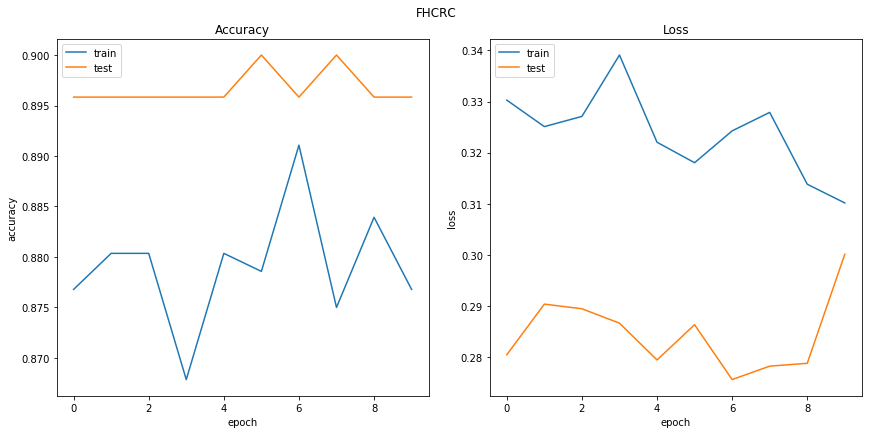

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,6))
fig.suptitle('FHCRC')
ax1.plot(history_FHCRC.history['acc'])
ax1.plot(history_FHCRC.history['val_acc'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_FHCRC.history['loss'])
ax2.plot(history_FHCRC.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

##Harvard

In [0]:
model_Harvard = Sequential()
model_Harvard.add(Dense(560, input_dim=13, activation='relu' ,
                  kernel_initializer='glorot_uniform'))
model_Harvard.add(Dropout(0.8))
model_Harvard.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model_Harvard.add(Dropout(0.3))
model_Harvard.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_Harvard.add(Dropout(0.3))
model_Harvard.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_Harvard.add(Dense(1, activation='sigmoid'))
# Compile model
model_Harvard.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model_Harvard.summary()

W0707 10:11:33.916899 139698846631808 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 560)               7840      
_________________________________________________________________
dropout_8 (Dropout)          (None, 560)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                35904     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
__________

In [0]:
history_Harvard = model_Harvard.fit(X_train_Harvard, y_train_Harvard, batch_size=batch_size_Harvard, epochs=epochs_Harvard, validation_data=(X_test_Harvard, y_test_Harvard))

Train on 504 samples, validate on 217 samples
Epoch 1/10
504/504 [==============================] - 1s 1ms/step - loss: 0.6111 - acc: 0.7401 - val_loss: 0.4151 - val_acc: 0.8756
Epoch 2/10
504/504 [==============================] - 0s 74us/step - loss: 0.4185 - acc: 0.8611 - val_loss: 0.3054 - val_acc: 0.9032
Epoch 3/10
504/504 [==============================] - 0s 68us/step - loss: 0.3307 - acc: 0.8770 - val_loss: 0.3015 - val_acc: 0.8894
Epoch 4/10
504/504 [==============================] - 0s 68us/step - loss: 0.2997 - acc: 0.9107 - val_loss: 0.3033 - val_acc: 0.8940
Epoch 5/10
504/504 [==============================] - 0s 79us/step - loss: 0.2743 - acc: 0.9048 - val_loss: 0.2957 - val_acc: 0.8894
Epoch 6/10
504/504 [==============================] - 0s 64us/step - loss: 0.2618 - acc: 0.9167 - val_loss: 0.2940 - val_acc: 0.8894
Epoch 7/10
504/504 [==============================] - 0s 66us/step - loss: 0.2613 - acc: 0.9107 - val_loss: 0.3305 - val_acc: 0.8986
Epoch 8/10
504/504 [====

In [0]:
train_loss_Harvard, train_acc_Harvard = model_Harvard .evaluate(X_train_Harvard, y_train_Harvard, verbose=0)
test_loss_Harvard, test_acc_Harvard = model_Harvard .evaluate(X_test_Harvard, y_test_Harvard, verbose=0)

In [0]:
print('Test Loss: {}'.format(test_loss_Harvard))
print('Test Accuracy: {}'.format(test_acc_Harvard))

Test Loss: 0.30849056419688986
Test Accuracy: 0.8894009235817166


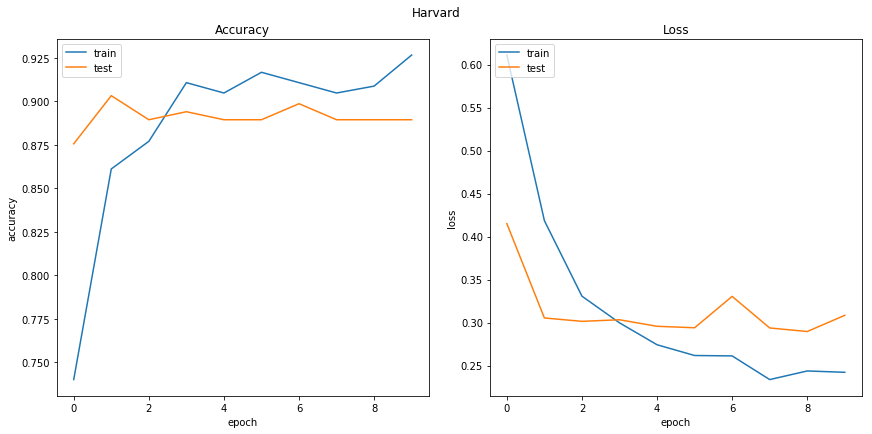

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,6))
fig.suptitle('Harvard')
ax1.plot(history_Harvard.history['acc'])
ax1.plot(history_Harvard.history['val_acc'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_Harvard.history['loss'])
ax2.plot(history_Harvard.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

##MD Anderson

In [0]:
model_MD_Anderson = Sequential()
model_MD_Anderson.add(Dense(560, input_dim=9, activation='tanh' ,
                  kernel_initializer='normal'))
model_MD_Anderson.add(Dropout(0.4))
model_MD_Anderson.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model_MD_Anderson.add(Dropout(0.3))
model_MD_Anderson.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_MD_Anderson.add(Dropout(0.3))
model_MD_Anderson.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_MD_Anderson.add(Dense(1, activation='sigmoid'))
# Compile model
model_MD_Anderson.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model_MD_Anderson.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 560)               5600      
_________________________________________________________________
dropout_11 (Dropout)         (None, 560)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                35904     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
__________

In [0]:
history_MD_Anderson = model_MD_Anderson.fit(X_train_MD_Anderson, y_train_MD_Anderson, batch_size=batch_size_MD_Anderson, epochs=epochs_MD_Anderson, validation_data=(X_test_MD_Anderson, y_test_MD_Anderson))

Train on 548 samples, validate on 235 samples
Epoch 1/10
548/548 [==============================] - 1s 1ms/step - loss: 0.5932 - acc: 0.7536 - val_loss: 0.4319 - val_acc: 0.8298
Epoch 2/10
548/548 [==============================] - 0s 61us/step - loss: 0.4487 - acc: 0.7883 - val_loss: 0.4080 - val_acc: 0.8340
Epoch 3/10
548/548 [==============================] - 0s 64us/step - loss: 0.4260 - acc: 0.7974 - val_loss: 0.4070 - val_acc: 0.8681
Epoch 4/10
548/548 [==============================] - 0s 51us/step - loss: 0.4143 - acc: 0.8266 - val_loss: 0.4030 - val_acc: 0.8723
Epoch 5/10
548/548 [==============================] - 0s 65us/step - loss: 0.3905 - acc: 0.8358 - val_loss: 0.3978 - val_acc: 0.8638
Epoch 6/10
548/548 [==============================] - 0s 61us/step - loss: 0.3818 - acc: 0.8467 - val_loss: 0.3904 - val_acc: 0.8681
Epoch 7/10
548/548 [==============================] - 0s 60us/step - loss: 0.3874 - acc: 0.8376 - val_loss: 0.3853 - val_acc: 0.8596
Epoch 8/10
548/548 [====

In [0]:
train_loss_MD_Anderson, train_acc_MD_Anderson = model_MD_Anderson.evaluate(X_train_MD_Anderson, y_train_MD_Anderson, verbose=0)
test_loss_MD_Anderson, test_acc_MD_Anderson = model_MD_Anderson.evaluate(X_test_MD_Anderson, y_test_MD_Anderson, verbose=0)

In [0]:
print('Test Loss: {}'.format(test_loss_MD_Anderson))
print('Test Accuracy: {}'.format(test_acc_MD_Anderson))

Test Loss: 0.3747353255748749
Test Accuracy: 0.868085106129342


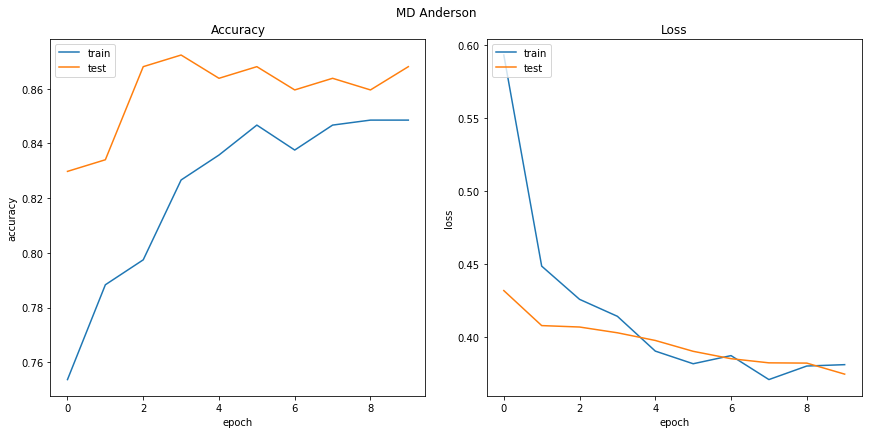

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,6))
fig.suptitle('MD Anderson')
ax1.plot(history_MD_Anderson.history['acc'])
ax1.plot(history_MD_Anderson.history['val_acc'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_MD_Anderson.history['loss'])
ax2.plot(history_MD_Anderson.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

##Pittsburgh

In [0]:
model_Pittsburgh = Sequential()
model_Pittsburgh.add(Dense(560, input_dim=34, activation='relu' ,
                  kernel_initializer='glorot_uniform'))
model_Pittsburgh.add(Dropout(0.3))
model_Pittsburgh.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model_Pittsburgh.add(Dropout(0.3))
model_Pittsburgh.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_Pittsburgh.add(Dropout(0.3))
model_Pittsburgh.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_Pittsburgh.add(Dense(1, activation='sigmoid'))
# Compile model
model_Pittsburgh.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_Pittsburgh.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 560)               19600     
_________________________________________________________________
dropout_14 (Dropout)         (None, 560)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                35904     
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
__________

In [0]:
history_Pittsburgh = model_Pittsburgh.fit(X_train_Pittsburgh, y_train_Pittsburgh, batch_size=batch_size_Pittsburgh, epochs=epochs_Pittsburgh, validation_data=(X_test_Pittsburgh, y_test_Pittsburgh))

Train on 501 samples, validate on 216 samples
Epoch 1/10
501/501 [==============================] - 1s 1ms/step - loss: 0.6165 - acc: 0.7086 - val_loss: 0.4630 - val_acc: 0.8287
Epoch 2/10
501/501 [==============================] - 0s 86us/step - loss: 0.4976 - acc: 0.7844 - val_loss: 0.3342 - val_acc: 0.8287
Epoch 3/10
501/501 [==============================] - 0s 75us/step - loss: 0.3872 - acc: 0.8184 - val_loss: 0.2908 - val_acc: 0.8981
Epoch 4/10
501/501 [==============================] - 0s 81us/step - loss: 0.3552 - acc: 0.8723 - val_loss: 0.2565 - val_acc: 0.8935
Epoch 5/10
501/501 [==============================] - 0s 74us/step - loss: 0.3192 - acc: 0.8842 - val_loss: 0.2329 - val_acc: 0.8981
Epoch 6/10
501/501 [==============================] - 0s 73us/step - loss: 0.2664 - acc: 0.9082 - val_loss: 0.2443 - val_acc: 0.9074
Epoch 7/10
501/501 [==============================] - 0s 82us/step - loss: 0.3108 - acc: 0.8822 - val_loss: 0.2337 - val_acc: 0.9074
Epoch 8/10
501/501 [====

In [0]:
train_loss_Pittsburgh, train_acc_Pittsburgh = model_Pittsburgh.evaluate(X_train_Pittsburgh, y_train_Pittsburgh, verbose=0)
test_loss_Pittsburgh, test_acc_Pittsburgh = model_Pittsburgh.evaluate(X_test_Pittsburgh, y_test_Pittsburgh, verbose=0)

In [0]:
print('Test Loss: {}'.format(test_loss_Pittsburgh))
print('Test Accuracy: {}'.format(test_acc_Pittsburgh))

Test Loss: 0.250621383940732
Test Accuracy: 0.9027777755701983


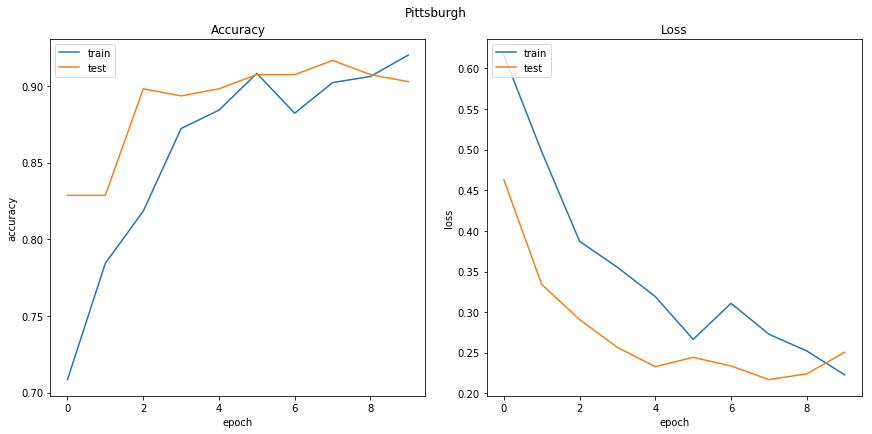

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,6))
fig.suptitle('Pittsburgh')
ax1.plot(history_Pittsburgh.history['acc'])
ax1.plot(history_Pittsburgh.history['val_acc'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_Pittsburgh.history['loss'])
ax2.plot(history_Pittsburgh.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')